## Q3. Dataset Analysis (30 pts)

### 3.1 Basic Counts
#### a. Compute the number of distinct authors, publication venues, publications, and citations/references

In [1]:
import csv

In [2]:

with open("Downloads\AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    count = 0
    author = set()
    venues = set()
    publications = set()
    citations = set()
    index = ""
    for row in apfile:
        if row.startswith("#@"):            
            for column in row[3:].split(";"):
                 author.add(column.strip())
        elif row.startswith("#c"):
            venues.add(row)
        elif row.startswith("#%"):
            citations.add(index+row)
        elif row.startswith("#index"):
            index = row[7:]
            publications.add(row)
    # The total number contain the null author value as well!            
    print("Number of Authors" , len(author))
    print("Number of Venues" , len(venues))
    print("Number of References" , len(citations))
    print("Number of Publications" , len(publications))

Number of Authors 1478734
Number of Venues 255686
Number of References 7250326
Number of Publications 1976815


#### b. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference \Principles and Practice of Knowledge Discovery in Databases" what do you notice?

In [3]:
venue_set = set()

with open("Downloads\AP_train.txt",'r', newline='', encoding="utf8") as apfile:       
    index = ""
    venue = ""
    for row in apfile:
        if row.startswith("#c"):
            if "Principles and Practice of Knowledge Discovery in Databases" in row:
                venue = row[3:]
                venue_set.add(venue)

print("Venues lists are ")
for venue in venue_set:            
    print(venue)

Venues lists are 
Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases



***Some of the venue names consist dates and locations of the conferences and also about which stream the lecture is on. While the same venue in another publication might not have the same description of the venue. Making the two venues different. Thus, the venue numbers are a lot more bloated than the actual number of venues. Hence, the count numbers don't seem accurate !!***

### 3.2 Publications, Authors, Venues
#### a. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis).

In [72]:
author_publications = {}

# Considering each Citation as one
with open("Downloads\AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    for row in apfile:
        if row.startswith("#@"):            
            for column in row[3:].split(";"):
                if author_publications.get(column.strip()) == None:
                    author_publications[column.strip()] = 1
                else:
                    author_publications[column.strip()]  += 1
                    
authors = list(author_publications.keys())
publications = list(author_publications.values()) 



In [73]:
# Removing values for the null author and it's respective publication count , 
# because it is an outlier in this case and has a value much greater than the mean. 

null_index = authors.index("")
del authors[null_index]
del publications[null_index]

1071


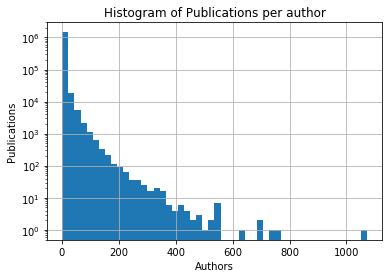

In [74]:
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.xlabel('Authors')
plt.ylabel('Publications')
plt.title('Histogram of Publications per author')
plt.grid(True)

plt.hist(publications,bins=50,log=True)
plt.show()

#### b. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the dierence between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [83]:
def xMean(xlist):
    xsum = 0;    
    for x in xlist:
        xsum += x
    return(xsum/len(xlist))

In [84]:
print("Mean of publications per author = " , xMean(publications))

Mean of publications per author =  3.291785602945224


In [85]:
def xMedian(xList):
    xList.sort()    
    if len(xList)%2 == 0:
        return((xList[int(len(xList)/2-1)] + xList[int(len(xList)/2)])/2 , int(len(xList)/2-1) , int(len(xList)/2))
    else:
        return(xList[math.ceil(len(xList)/2-1)] , int(math.ceil(len(xList)/2-1)))        

In [86]:
print("Median of publications per author = " , xMedian(publications)[0])

Median of publications per author =  1


In [87]:
def xQuartile(xList):
    xList.sort()    
    
    med = xMedian(xList)    
    second = int(med[0])
    first = xMedian(xList[1:med[1]])[0]
    third = xMedian(xList[med[1]:])[0] 
    
    return(first,second,third)

In [88]:
print("Firt Second and Third Quartile are as follows : " , xQuartile(publications))

Firt Second and Third Quartile are as follows :  (1, 1, 2)


In [89]:
def xSD(xList):
    xList.sort()
    mean = xMean(xList)
    
    xSDSum = 0.0
    for i in xList:
        xSDSum += pow(i-mean,2)
    
    return(pow(1/len(xList) * xSDSum,1/2))

In [91]:
print("SD of publications per author = " , xSD(publications))

SD of publications per author =  8.871889691035385


**Based on the values of the median and quartile we can infer the following:**
** The majority of the authors in the dataset have one publication as both the first quartile and the median is 1 **
** Also from the histogram we can see the next major element is 2. **
** Thus , the difference in the mean and the median is justified , as we expect not many authors to have great number of publications(as seen from the histogram) , there will be a very small subset of authors with a huge number of publications and those account to the mean being over 3.**

#### c) Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

In [92]:
venue_publications = {}

# Considering each occurence as one publication
with open("Downloads\AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    for row in apfile:
        if row.startswith("#c"):                        
            if venue_publications.get(row[3:]) == None:
                venue_publications[row[3:]] = 1
            else:
                venue_publications[row[3:]]  += 1
                    
venues = list(venue_publications.keys())
publications = list(venue_publications.values()) 

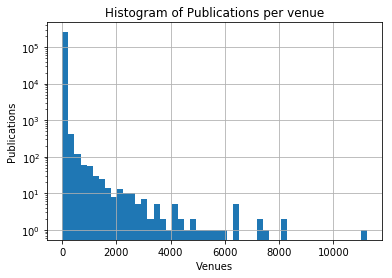

In [93]:
import matplotlib.pyplot as plt

plt.xlabel('Venues')
plt.ylabel('Publications')
plt.title('Histogram of Publications per venue')
plt.grid(True)

plt.hist(publications,bins=50,log=True)
plt.show()

In [94]:
print("Mean of publications per venue = " , xMean(publications[2:]))
print("Median of publications per venue = " , xMedian(publications[2:])[0])
print("Firt Second and Third Quartile are as follows : " , xQuartile(publications[2:]))
print("SD of publications per venue = " , xSD(publications[2:]))
      

Mean of publications per venue =  7.715160119522536
Median of publications per venue =  1.0
Firt Second and Third Quartile are as follows :  (1.0, 1, 1)
SD of publications per venue =  83.0926721987981


In [95]:
print("Max publication at Venue = " , venues[list(venue_publications.values()).index(max(list(venue_publications.values())))])

Max publication at Venue =  IEEE Transactions on Information Theory



## 3.3 References, Citations, Impact

#### a. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [96]:
ref = {}
cite = {}
cite_count_venue = {}
venue_publicationName = {}
# Creatig data structures used for 3.3 
with open("Downloads\AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    index = 0
    venue = ""
    for row in apfile:        
        if row.startswith("#index"):                        
            index = int(row[7:])
        elif row.startswith("#c"):                        
            venue = row[3:]
            if venue_publicationName.get(index) == None:
                venue_publicationName[index] = venue
        elif row.startswith("#%"):
            if ref.get(index) == None:
                ref[index] = 1
            else:
                ref[index]  += 1
                
            if cite.get(int(row[3:])) == None:
                cite[int(row[3:])] = 1
            else:
                cite[int(row[3:])]  += 1                            
            
            cite_venue = venue_publicationName.get(int(row[3:]))
            if cite_count_venue.get(cite_venue) == None:
                cite_count_venue[cite_venue] = 1
            else:
                cite_count_venue[cite_venue] += 1
                    
print("Total references", len(ref))
print("Total cites", len(cite))

Total references 797454
Total cites 871089


In [137]:
print("Publication index with max References = " , list(ref.keys())[list(ref.values()).index(max(list(ref.values())))] , "with value = ",max(list(ref.values())))
print("Publication index with max Citations = " , list(cite.keys())[list(cite.values()).index(max(list(cite.values())))] , "with value = ",max(list(cite.values())))

Publication index with max References =  719353 with value =  772
Publication index with max Citations =  408396 with value =  7753


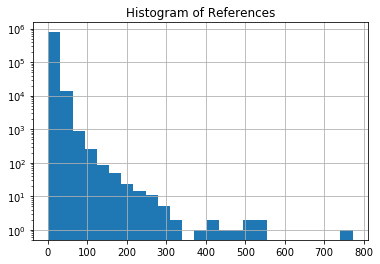

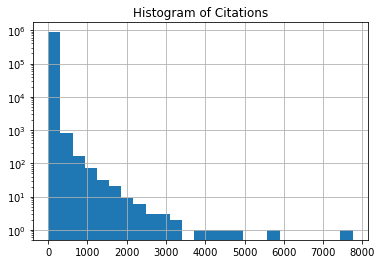

In [98]:
import matplotlib.pyplot as plt

plt.title('Histogram of References')
plt.grid(True)

plt.hist(list(ref.values()),bins=25,log=True)
plt.show()


plt.title('Histogram of Citations')
plt.grid(True)

plt.hist(list(cite.values()),bins=25,log=True)
plt.show()


** It makes sense because the number of histograms is almost equivalent to the number of references , which should ideally be the case, the missing numbers can be attributed to the number of publications not included in the data set. The maximum citations for the paper also makes sense because some papers only refer to other papers and review them and the citations also make sense as some fundamental paper like MapReduce will be referred in all subsequent paper published on the same topic!**

#### b) Calculate the so called \impact" factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results.

In [139]:
venue_impact = {}

for venue in cite_count_venue.keys():   
    venue_impact[venue] = 0    
    if venue != 'None' and venue_publications.get(venue) != None :
        venue_impact[venue] = cite_count_venue[venue]/venue_publications[venue]        

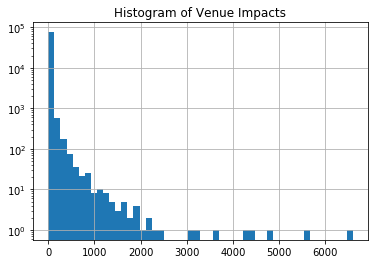

In [140]:
import matplotlib.pyplot as plt

plt.title('Histogram of Venue Impacts')
plt.grid(True)

plt.hist(list(venue_impact.values()),bins=50,log=True)
plt.show()

#### c. What is the venue with the highest apparent impact factor? Do you believe this number?

In [141]:
max_index = list(venue_impact.values()).index(max(list(venue_impact.values())))
print("Venue with max impact = " , list(venue_impact.keys())[max_index])

Venue with max impact =  Computers and Intractability: A Guide to the Theory of NP-Completeness



** The venue impact factor is directly related to the number of citations of all papers from a venue has got v/s the number of papers published at that venue. Since first we have discovered the name of the venues are written differently in different data records. Thus, we know that the number might as well be not accurate. Also , in an ideal scenario the venue impact would be the highest for venues that publish less but great quality papers , but in real scenario venues that publish great quality papers , generally would publish a lot of papers . Thus the impact factor above seems unbelivable.**

#### d. Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

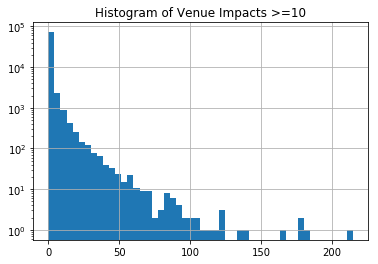

In [142]:
venue_impact = {}

for venue in cite_count_venue.keys():   
    venue_impact[venue] = 0    
    if venue != 'None' and venue_publications.get(venue) != None and venue_publications[venue] >=10 :
        venue_impact[venue] = cite_count_venue[venue]/venue_publications[venue]        

import matplotlib.pyplot as plt

plt.title('Histogram of Venue Impacts >=10')
plt.grid(True)

plt.hist(list(venue_impact.values()),bins=50,log=True)
plt.show()

The values seem much more belivable now.

In [143]:
max_index = list(venue_impact.values()).index(max(list(venue_impact.values())))
print("Venue with max impact = " , list(venue_impact.keys())[max_index] , " with value = " , list(venue_impact.values())[max_index])
print("Median of citations" , xMedian(list(cite_count_venue.values()))[0])

Venue with max impact =  Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications
  with value =  214.6086956521739
Median of citations 5.0


#### e) Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [118]:
year_publications = {}
year_avg = {}

with open("Downloads\AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    index = 0
    year = 0
    for row in apfile:        
        if row.startswith("#index"):                        
            index = int(row[7:])
        elif row.startswith("#t") and len(row)==8:
            year = int(row[3:])            
            if year_publications.get(year) == None:
                year_publications[year] = {"publications":0,"cites":0,"refs":0}
                year_publications[year]["publications"] = 1                
                if cite.get(index) != None:
                    year_publications[year]["cites"] = cite.get(index)
                if ref.get(index) != None:
                    year_publications[year]["refs"] = ref.get(index)
            else:
                year_publications[year]["publications"] += 1
                if cite.get(index) != None:
                    year_publications[year]["cites"] += cite.get(index)
                if ref.get(index) != None:
                    year_publications[year]["refs"] += ref.get(index)
    

In [136]:
import collections

for year in year_publications.keys():
    year_avg[year] = {}
    year_avg[year]["cites"] = year_publications[year]["cites"]/ year_publications[year]["publications"]
    year_avg[year]["refs"] = year_publications[year]["refs"]/ year_publications[year]["publications"]
    #print("Averages for year" ,year, year_avg[year])

year_avg = collections.OrderedDict(sorted(year_avg.items()))
# for year in year_avg.keys():
#     print("Averages for year" ,year, year_avg[year])

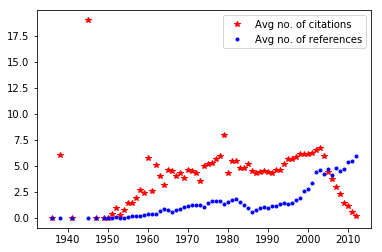

In [135]:
# Plotting avg references and citations / year

x = list(year_avg.keys())
y1 = list([year_avg[year]["cites"] for year in x])
y2 = list([year_avg[year]["refs"] for year in x])

fig, ax = plt.subplots()
ax.plot(x, y1, 'r*', label='Avg no. of citations')
ax.plot(x, y2, 'b.', label='Avg no. of references')

legend = ax.legend(loc='upper right')

plt.show()